# PATONG BEACH HOUSE Hotel EDA
This Jupyter notebook performs exploratory data analysis (EDA) on the synthetic bookings dataset for PATONG BEACH HOUSE hotel (Phuket, Thailand). Data covers bookings for the year 2023.

## 1. Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# Load the CSV file
df = pd.read_csv('PATONG_BEACH_HOUSE_customer_database.csv')

print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (2000, 13)


,Customer_ID,Customer_Name,Nationality,Room_Type,Units_Rooms,Days_Booked,Weekend_Days,Arrival_Month,Arrival_Month_Name,Price_Per_Room,Total_Payment,Cancellation,Year
0,1,Sophie Becker,Germany,family,2,5,1,3,March,2000,20000,0,2023
1,2,Hans Russo,Norway,couple,1,1,1,9,September,2000,1000,1,2023
2,3,Sergei Lebedev,Russia,family,2,5,4,6,June,2000,20000,0,2023
3,4,Sabine Wagner,Italy,single,1,2,2,6,June,2000,4000,0,2023
4,5,Olga Smirnov,Russia,couple,1,1,0,8,August,2000,2000,0,2023


## 2. Data Overview & Cleaning

In [2]:
df.info()

# Check for duplicates
duplicates = df.duplicated().sum()
print(f'Duplicate rows: {duplicates}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer_ID         2000 non-null   int64 
 1   Customer_Name       2000 non-null   object
 2   Nationality         2000 non-null   object
 3   Room_Type           2000 non-null   object
 4   Units_Rooms         2000 non-null   int64 
 5   Days_Booked         2000 non-null   int64 
 6   Weekend_Days        2000 non-null   int64 
 7   Arrival_Month       2000 non-null   int64 
 8   Arrival_Month_Name  2000 non-null   object
 9   Price_Per_Room      2000 non-null   int64 
 10  Total_Payment       2000 non-null   int64 
 11  Cancellation        2000 non-null   int64 
 12  Year                2000 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 203.3+ KB
Duplicate rows: 0


## 3. Descriptive Statistics

In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer_ID,2000.0,NaN,NaN,NaN,1000.5,577.494589,1.0,500.75,1000.5,1500.25,2000.0
Customer_Name,2000,1327,Anna Leroy,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nationality,2000,12,Russia,498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Room_Type,2000,3,couple,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Units_Rooms,2000.0,NaN,NaN,NaN,1.2445,0.490755,1.0,1.0,1.0,1.0,3.0
Days_Booked,2000.0,NaN,NaN,NaN,5.045,3.710507,1.0,2.0,4.0,7.0,14.0
Weekend_Days,2000.0,NaN,NaN,NaN,1.529,1.330806,0.0,0.0,1.0,3.0,4.0
Arrival_Month,2000.0,NaN,NaN,NaN,6.457,2.978017,1.0,4.0,7.0,9.0,12.0
Arrival_Month_Name,2000,12,July,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price_Per_Room,2000.0,NaN,NaN,NaN,2000.0,0.0,2000.0,2000.0,2000.0,2000.0,2000.0


## 4. Seasonal Analysis

In [4]:
seasonal_mapping = {1:'Cool',2:'Cool',3:'Hot',4:'Hot',5:'Hot',6:'Rainy',7:'Rainy',8:'Rainy',9:'Rainy',10:'Cool',11:'Cool',12:'Cool'}
df['Season'] = df['Arrival_Month'].map(seasonal_mapping)
seasonal_summary = df.groupby('Season').agg({'Customer_ID':'count','Total_Payment':'sum','Cancellation':'sum'}).rename(columns={'Customer_ID':'Bookings'})
seasonal_summary['Cancellation_Rate'] = (seasonal_summary['Cancellation']/seasonal_summary['Bookings']*100).round(2)
seasonal_summary

,Bookings,Total_Payment,Cancellation,Cancellation_Rate
Season,,,,
Cool,575,6742000,62,10.78
Hot,545,6714000,64,11.74
Rainy,880,10409000,79,8.98


C:\Users\KUSHANK\AppData\Local\Temp\ipykernel_2460\1667102988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_summary.reset_index(), x='Season', y='Bookings', palette='husl')


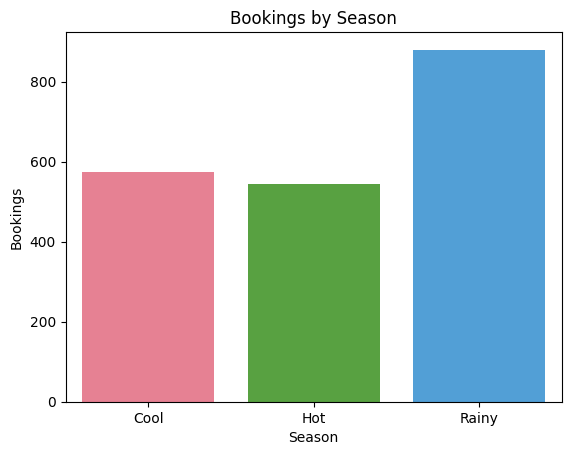

In [5]:
# Visual 1: Bookings by Season
sns.barplot(data=seasonal_summary.reset_index(), x='Season', y='Bookings', palette='husl')
plt.title('Bookings by Season')
plt.show()

## 5. Nationality & Revenue Analysis

In [6]:
nationality_summary = df.groupby('Nationality').agg({'Customer_ID':'count','Total_Payment':['sum','mean'],'Cancellation':'sum'}).sort_values(('Total_Payment','sum'),ascending=False)

# Flatten multi-index columns
nationality_summary.columns = ['Bookings','Revenue','Avg_Revenue','Cancellations']
nationality_summary = nationality_summary.head(10)
nationality_summary

,Bookings,Revenue,Avg_Revenue,Cancellations
Nationality,,,,
Russia,498,5768000,11582.329317,53
Germany,284,3237000,11397.887324,34
France,264,3107000,11768.939394,26
Italy,197,2257000,11456.852792,15
Spain,160,1988000,12425.000000,13
Sweden,131,1889000,14419.847328,13
Netherlands,131,1486000,11343.511450,14
Norway,106,1171000,11047.169811,17
Poland,66,916000,13878.787879,7


C:\Users\KUSHANK\AppData\Local\Temp\ipykernel_2460\1923031961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=nationality_summary.head(6).reset_index(), x='Revenue', y='Nationality', palette='viridis')


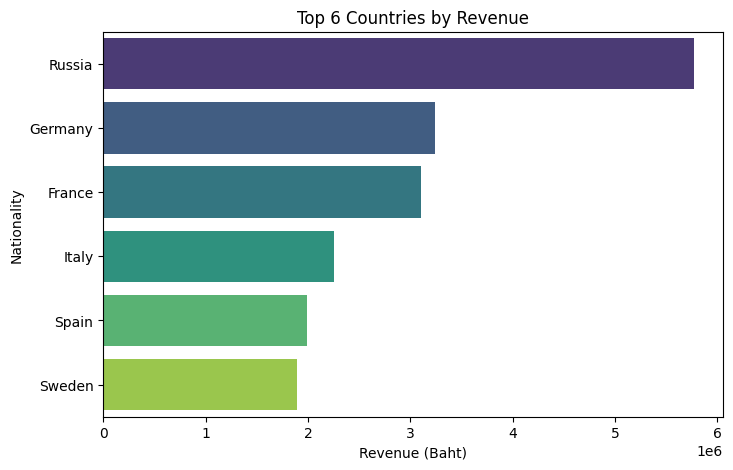

In [7]:
# Visual 2: Top 6 Countries by Revenue
plt.figure(figsize=(8,5))
ax = sns.barplot(data=nationality_summary.head(6).reset_index(), x='Revenue', y='Nationality', palette='viridis')
ax.set_title('Top 6 Countries by Revenue')
ax.set_xlabel('Revenue (Baht)')
plt.show()

## 6. Room Type Performance

In [8]:
room_summary = df.groupby('Room_Type').agg({'Customer_ID':'count','Total_Payment':'sum','Cancellation':'sum'}).rename(columns={'Customer_ID':'Bookings'})
room_summary['Revenue_Share_%'] = (room_summary['Total_Payment']/room_summary['Total_Payment'].sum()*100).round(2)
room_summary

,Bookings,Total_Payment,Cancellation,Revenue_Share_%
Room_Type,,,,
couple,1020,11678000,100,48.93
family,582,8500000,66,35.62
single,398,3687000,39,15.45


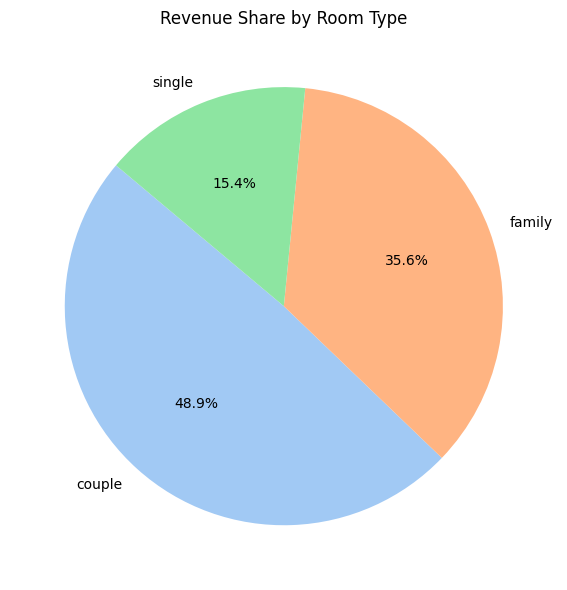

In [9]:
# Visual 3: Revenue Share by Room Type
plt.figure(figsize=(6,6))
plt.pie(room_summary['Total_Payment'], labels=room_summary.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Revenue Share by Room Type')
plt.tight_layout()
plt.show()

## 7. Weekend vs Weekday Bookings

In [10]:
df['Has_Weekend'] = (df['Weekend_Days']>0).astype(int)
weekend_summary = df.groupby('Has_Weekend').agg({'Customer_ID':'count','Total_Payment':'sum','Cancellation':'sum'}).rename(columns={'Customer_ID':'Bookings'})
weekend_summary['Cancellation_Rate'] = (weekend_summary['Cancellation']/weekend_summary['Bookings']*100).round(2)
weekend_summary.index = ['Weekday Only','Includes Weekend']
weekend_summary

,Bookings,Total_Payment,Cancellation,Cancellation_Rate
Weekday Only,548,5169000,69,12.59
Includes Weekend,1452,18696000,136,9.37


C:\Users\KUSHANK\AppData\Local\Temp\ipykernel_2460\828581222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=weekend_summary.reset_index(), x='index', y='Total_Payment', palette='Set2')
C:\Users\KUSHANK\AppData\Local\Temp\ipykernel_2460\828581222.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


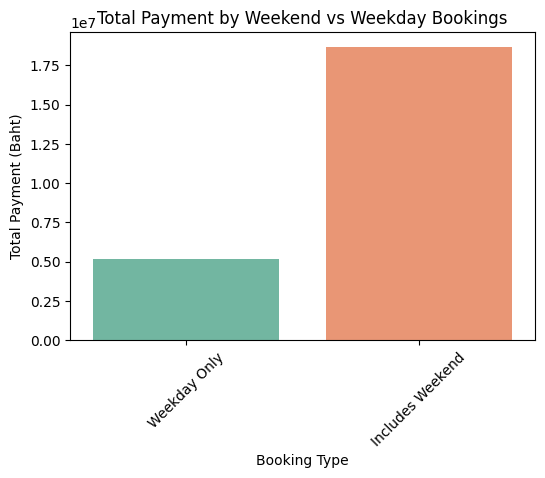

In [11]:
# Visual 4: Average Booking Value by Weekend Presence
plt.figure(figsize=(6,4))
ax = sns.barplot(data=weekend_summary.reset_index(), x='index', y='Total_Payment', palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel('Booking Type')
ax.set_ylabel('Total Payment (Baht)')
plt.title('Total Payment by Weekend vs Weekday Bookings')
plt.show()

## 8. Conclusion
* Rainy season brings the highest bookings and revenue with the lowest cancellation rate.
* Couple room type dominates revenue share.
* Russia, Germany, and France are the top revenue-generating markets.
* Weekend-inclusive stays have higher booking value but slightly lower cancellation rate.